# UKDC

In [8]:
import subprocess
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from mpl_toolkits.basemap import Basemap
import yaml
import json
import numpy as np

## GridPP sites

In [17]:
with open('../data/ukdc_site_locations.yaml') as file:
    site_data = yaml.load(file, Loader=yaml.
                          Loader)

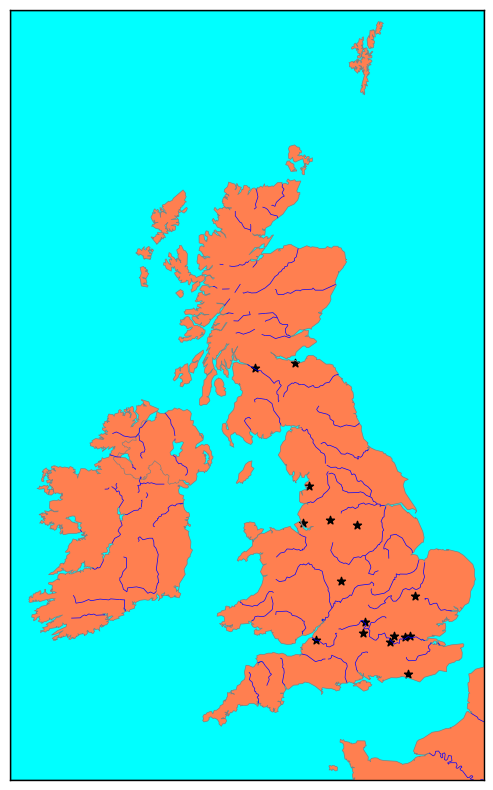

In [18]:
fig = plt.figure(figsize=(20,10))

# reduce so it's just the UK

m = Basemap(projection='merc',
            llcrnrlat=49, urcrnrlat=61,
            llcrnrlon=-11, urcrnrlon=2,
            lat_ts=0, resolution='i')


# Draw the map boundary and fill with color
m.drawmapboundary(fill_color='aqua')

# Fill the continents with a more natural color and the lakes with a specific color
m.fillcontinents(color='coral', lake_color='aqua')

# Draw coastlines and countries with a more detailed color
m.drawcoastlines(linewidth=0.5, color='gray')
m.drawcountries(linewidth=0.5, color='gray')

# Draw rivers with a specific color
m.drawrivers(color='blue')

# Add relief shading for topography
m.shadedrelief()

x = []
y = []
for site in site_data.keys():
    long, lat = m(site_data[site]['Latitude'], site_data[site]['Longitude'])
    x.append(long)
    y.append(lat)
plt.scatter(x, y, marker='*', color='black')

plt.show()

In [ ]:
# Get job IDs

account_name = "lz"

command = "source /cvmfs/dirac.egi.eu/dirac/bashrc_gridpp"
command += f" && dirac-wms-job-status --JobGroup={account_name}"
result = subprocess.run(command, capture_output=True, text=True, shell=True)

In [ ]:
# extract just the job IDs
job_ids = [(j.split(' ')[0]).split('=')[1] for j in result.stdout.split('\n')[:-1]]

In [ ]:
# Get job parameters

command = "source /cvmfs/dirac.egi.eu/dirac/bashrc_gridpp"
command += f" && dirac-wms-job-parameters"
for job_id in tqdm.tqdm(job_ids):
    command += f" {job_id}"
result = subprocess.run(command, capture_output=True, text=True, shell=True)

In [ ]:
# Save as running the above takes a while
info = result.stdout
# Add "" to jobID so it is readable by json -> pandas
info = result.stdout
info = info.replace("'", '"')
info = "\n" + info
info = info.replace('\n{', '\n{"')
info = info.replace(': {', '": {')
info = info.replace('}}', '}},')
info = info[1:-2]
info = '[' + info + ']'
with open('ukdc_data.json', 'w') as outfile:
    outfile.write(info)

In [5]:
# Now load and do stuff...
with open('../data/ukdc_data.json') as f:
    data = json.load(f)

In [6]:
sites = []
cpus = []
for entry in tqdm.tqdm(data):
    # only one key per entry
    for key in entry:
        try:
            sites.append(entry[key]['AgentLocalSE'].split(',')[0])
            cpus.append(entry[key]['ModelName'])
        except:
            continue

100%|██████████| 1597/1597 [00:00<00:00, 956490.57it/s]


In [9]:
bins = np.unique(sites)
weights = []
for entry in tqdm.tqdm(bins):
    count = 0
    for s in sites:
        if s == entry:
            count += 1
    weights.append(count)

100%|██████████| 12/12 [00:00<00:00, 8297.34it/s]


In [11]:
sum(weights)

1597

In [15]:
1597 / 258

6.189922480620155

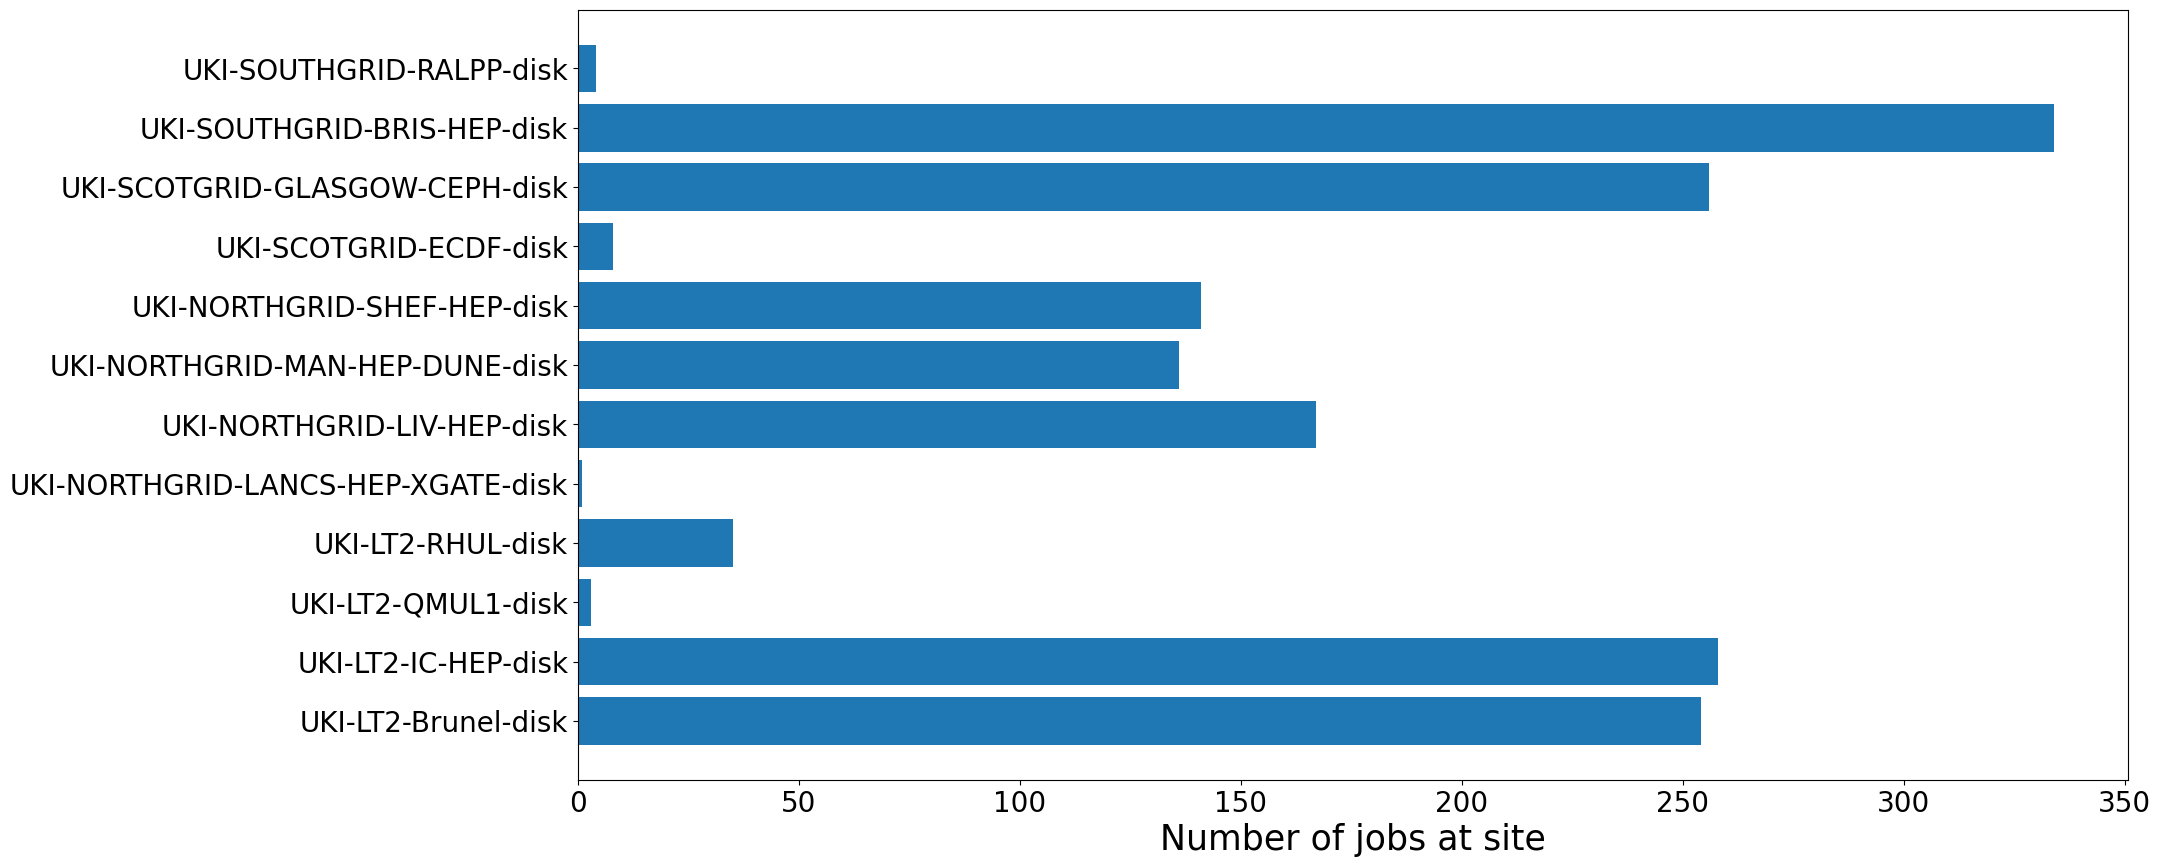

In [20]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.barh(bins, weights)
ax.set_xlabel('Number of jobs at site', fontsize=25)
# incease tick labels fontsize
plt.tick_params(axis='x', labelsize=20)  # for x-axis
plt.tick_params(axis='y', labelsize=20)  # for y-axis

#ax.pie(weights, weights)
plt.show()

In [21]:
bins = np.unique(cpus)
weights = []
for entry in tqdm.tqdm(bins):
    count = 0
    for s in cpus:
        if s == entry:
            count += 1
    weights.append(count)

100%|██████████| 36/36 [00:00<00:00, 11392.41it/s]


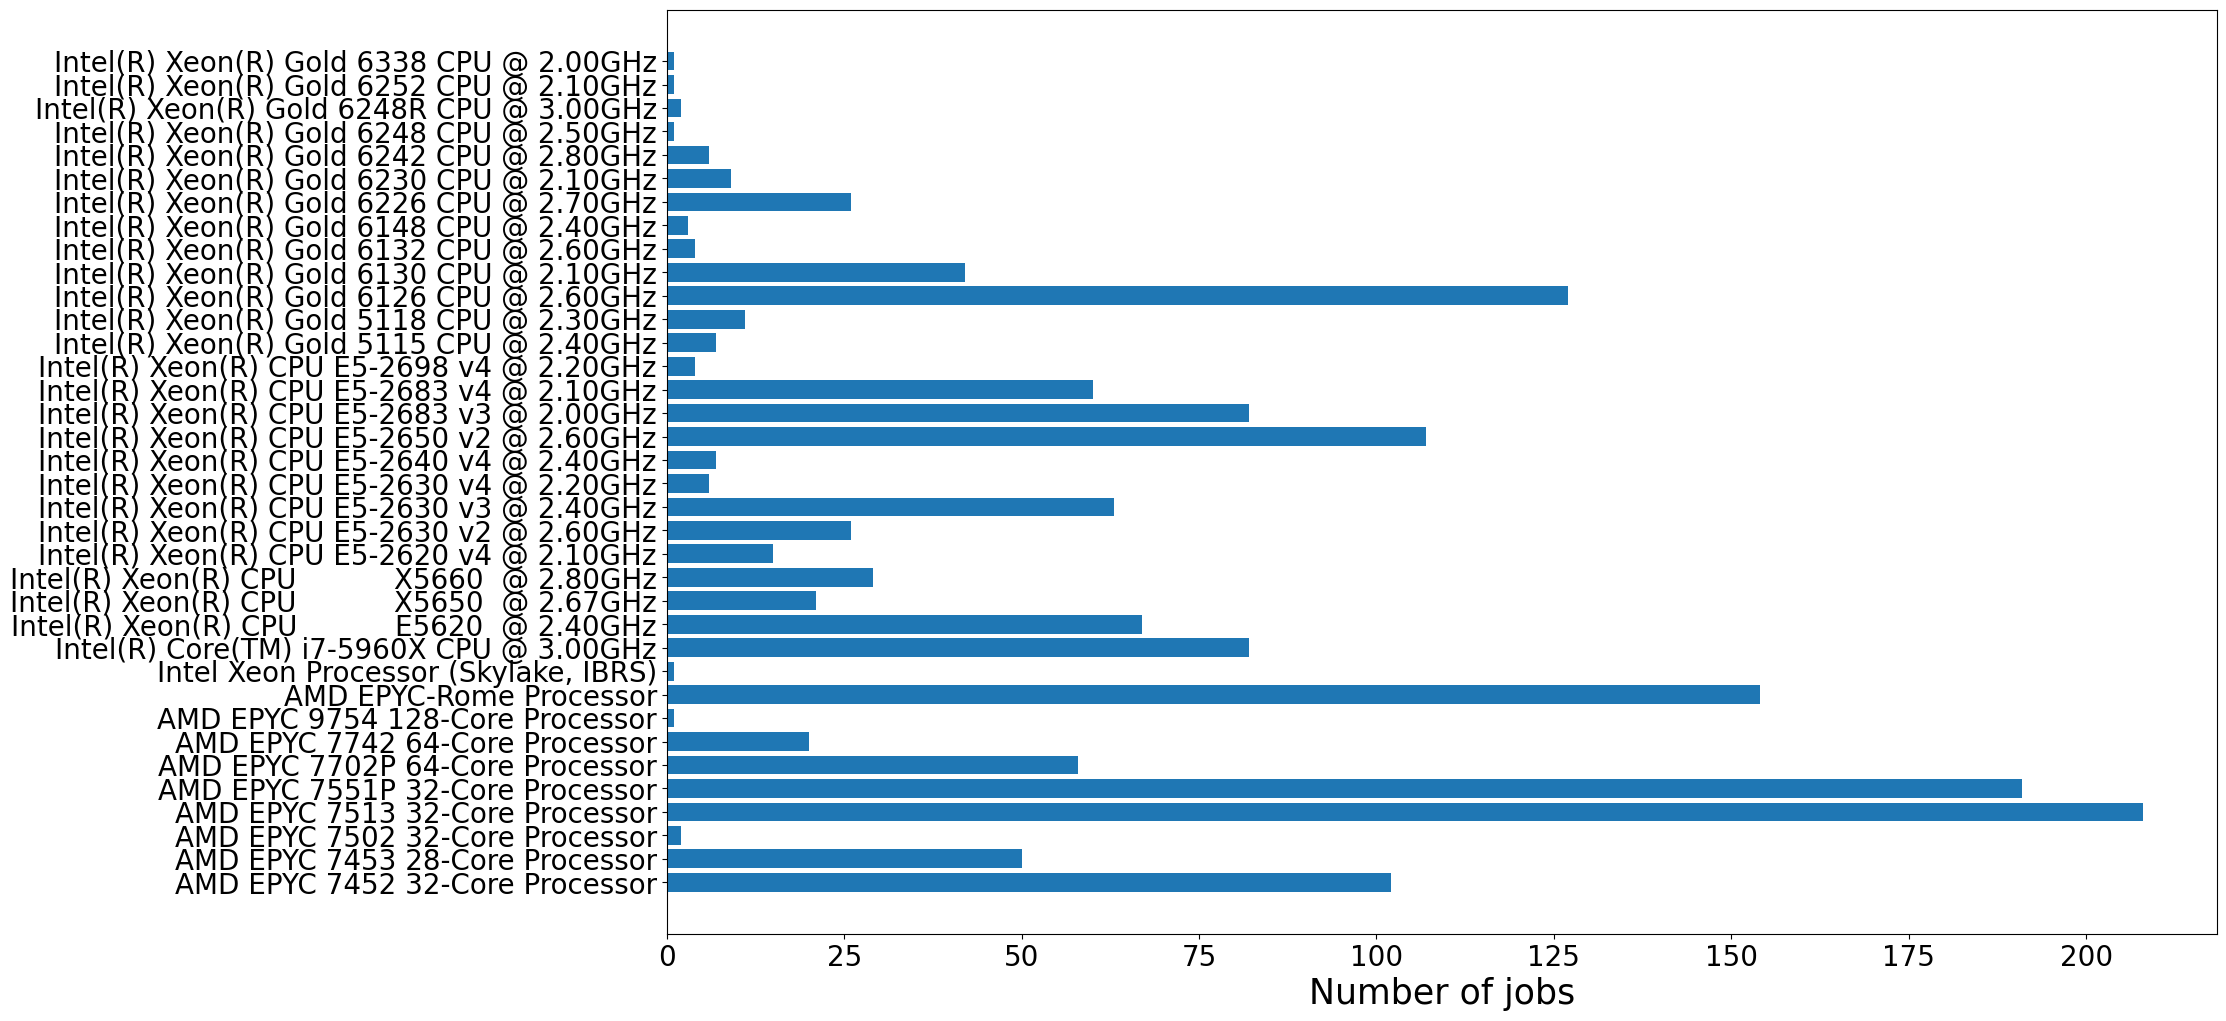

In [23]:
fig, ax = plt.subplots(1,1,figsize=(20,12))
ax.barh(bins, weights)
ax.set_xlabel('Number of jobs', fontsize=25)
plt.tick_params(axis='x', labelsize=20)  # for x-axis
plt.tick_params(axis='y', labelsize=20)  # for y-axis
plt.show()